In [3]:
import os
from IPython.display import IFrame
import pandas as pd
import sys
sys.path.insert(0, '../JKBio/')
import epigenetics.ChIP_helper as chiphelper
import Helper as helper
import igv
%load_ext autoreload
%autoreload 2

## adding the data bucket to path

In [2]:
! gcsfuse --only-dir Chip_AML jkobject data/seqs

Using mount point: /home/jeremie/AMLproject/data/seqs
Opening GCS connection...
Opening bucket...
Mounting file system...
File system has been successfully mounted.


## doing nextflow analysis

In [4]:
singleend, pairedend = chiphelper.extractPairedSingleEndFrom('data/seqs')

In [ ]:
! nextflow run nf-core/chipseq --singleEnd --outdir 'data/results' --seq_center 'DFCI'
--email 'jkobject@gmail.com' --skipDiffAnalysis --narrowPeak --design singleend.csv
--max_cpus 15 --max_memory "14.GB" --genome GRCh37 -profile docker -resume --skipPreseq

## displayingPeaks

In [4]:
bindings = chiphelper.loadNarrowPeaks('data/seqs/results/bwa/narrowPeak/', isMacs=False,skiprows=1)

/home/jeremie/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
bindings

,chrom,start,end,peak_number,size,foldchange,-log10pvalue,-log10qvalue,relative_summit_pos,name
0,1,10151,10661,SMC1_R1_peak_1,12213950,5.84939,21.35620,18.56608,323,SMC1_R1_peaks
1,1,237573,237944,SMC1_R1_peak_2,12213950,25.09560,89.74677,86.13345,180,SMC1_R1_peaks
0,1,240866,241173,PU1_R1_peak_1,12213950,4.62773,6.61859,4.54232,172,PU1_R1_peaks
0,1,240888,241096,MAX_R1_peak_1,12213950,4.64352,7.49377,5.41401,158,MAX_R1_peaks
2,1,521397,521761,SMC1_R1_peak_3,12213950,18.57726,59.50064,56.17862,185,SMC1_R1_peaks
...,...,...,...,...,...,...,...,...,...,...
36854,Y,28461300,28461596,CTCF_R1_peak_36855,12213950,9.05243,15.02673,12.30668,140,CTCF_R1_peaks
36855,Y,28709197,28709471,CTCF_R1_peak_36856,12213950,5.76064,8.45496,5.89134,111,CTCF_R1_peaks
5,Y,59002975,59003351,IGG_R1_peak_6,12213950,2.66065,9.67161,2.99059,194,IGG_R1_peaks
24453,Y,59004665,59004905,CEBPA_R1_peak_24454,12213950,4.54848,16.17649,12.97859,110,CEBPA_R1_peaks


In [16]:
bindings.to_csv('temp/bindings.bed',sep='\t',index=False,header=False)

In [5]:
bindings= pd.read_csv('temp/bindings.bed',sep='\t',header=None, 
                      names=["chrom","start","end","peak_number","size","foldchange","-log10pvalue",
                             "-log10qvalue","relative_summit_pos","name"])

/home/jeremie/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
bindings

,chrom,start,end,peak_number,size,foldchange,-log10pvalue,-log10qvalue,relative_summit_pos,name
0,1,10151,10661,SMC1_R1_peak_1,12213950,5.84939,21.35620,18.56608,323,SMC1_R1_peaks
1,1,237573,237944,SMC1_R1_peak_2,12213950,25.09560,89.74677,86.13345,180,SMC1_R1_peaks
2,1,240866,241173,PU1_R1_peak_1,12213950,4.62773,6.61859,4.54232,172,PU1_R1_peaks
3,1,240888,241096,MAX_R1_peak_1,12213950,4.64352,7.49377,5.41401,158,MAX_R1_peaks
4,1,521397,521761,SMC1_R1_peak_3,12213950,18.57726,59.50064,56.17862,185,SMC1_R1_peaks
...,...,...,...,...,...,...,...,...,...,...
1221390,Y,28461300,28461596,CTCF_R1_peak_36855,12213950,9.05243,15.02673,12.30668,140,CTCF_R1_peaks
1221391,Y,28709197,28709471,CTCF_R1_peak_36856,12213950,5.76064,8.45496,5.89134,111,CTCF_R1_peaks
1221392,Y,59002975,59003351,IGG_R1_peak_6,12213950,2.66065,9.67161,2.99059,194,IGG_R1_peaks
1221393,Y,59004665,59004905,CEBPA_R1_peak_24454,12213950,4.54848,16.17649,12.97859,110,CEBPA_R1_peaks


In [6]:
SEgenes = pd.read_csv('data/SEgenes.csv')
CTF = pd.read_csv('data/CTF.csv', header=None)[0].tolist()
CTF.extend(['GATA2','IKZF1','LYL1' ,'PU1','SMC1'])
CTF = list(set(CTF) - (set(CTF) - set([i.split('_')[0] for i in set(bindings.name.tolist())])))
CTF

['MEF2D',
 'IRF2BP2',
 'ZMYND8',
 'CEBPA',
 'LYL1',
 'SMC1',
 'LMO2',
 'MEF2C',
 'RUNX1',
 'ZEB2',
 'ELF2',
 'MEIS1',
 'GFI1',
 'RUNX2',
 'IKZF1',
 'FLI1',
 'GSE1',
 'GATA2',
 'PU1',
 'SP1',
 'MYB',
 'IRF8',
 'MYC',
 'ETV6']

In [31]:
bindings[bindings.name=='MYC_R1_peaks'].to_csv('temp/mycpeaks.bed',sep='\t',index=False,header=False)

In [10]:
peakstoplot, figure = chiphelper.Bedtools_computePeaksAt(
    bindings[bindings.name=='MYC_R1_peaks'],
    bams=[
    "MYC_R1.mLb.clN.sorted.bam",
    "IKZF1_R1.mLb.clN.sorted.bam",
    "DMSO_H3K27ac_R1.mLb.clN.sorted.bam",
    "ELF2_R1.mLb.clN.sorted.bam"
], folder='data/seqs/results/bwa/',numthreads=4)

../JKBio/epigenetics/ChIP_helper.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaks['start'] = [c - window for c in center]
../JKBio/epigenetics/ChIP_helper.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaks['end'] = [c + window - 1 for c in center]
/home/jeremie/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


> /home/jeremie/JKBio/epigenetics/ChIP_helper.py(203)Bedtools_computePeaksAt()
-> for i, (k, val) in enumerate(peaks.iterrows()):
(Pdb) n
> /home/jeremie/JKBio/epigenetics/ChIP_helper.py(204)Bedtools_computePeaksAt()
-> print(i / len(peaks), end='\r')
(Pdb) n
> /home/jeremie/JKBio/epigenetics/ChIP_helper.py(205)Bedtools_computePeaksAt()
-> while coverage.iloc[j].start > val.start:
(Pdb) n
> /home/jeremie/JKBio/epigenetics/ChIP_helper.py(207)Bedtools_computePeaksAt()
-> while coverage.iloc[j].start < val.end:
(Pdb) coverage.iloc[j].start
539806
(Pdb) coverage.iloc[j]
chrom            1
start       539806
end         540596
coverage         0
Name: 0, dtype: object
(Pdb) j
*** The 'jump' command requires a line number
(Pdb) print(j)
0
(Pdb) val
chrom                              1
start                         539806
end                           541805
peak_number            MYC_R1_peak_1
size                        12213950
foldchange                    11.483
-log10pvalue             

KeyboardInterrupt: 

In [9]:
peakstoplot, figure = chiphelper.computePeaksAt(
    bindings[bindings.name=='MYC_R1_peaks'],
    bams=[
    "MYC_R1.mLb.clN.sorted.bam",
    "IKZF1_R1.mLb.clN.sorted.bam",
    "DMSO_H3K27ac_R1.mLb.clN.sorted.bam",
    "ELF2_R1.mLb.clN.sorted.bam"
], folder='data/seqs/results/bwa/',numthreads=4)

KeyboardInterrupt: 

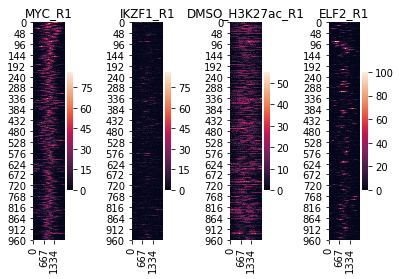

In [37]:
figure.show()

## Marking each TF with a different quality score

## merging duplicates

In [42]:
replicates = chiphelper.findReplicates(folder='data/seqs/results/bwa/', sep='_', namings='_R([0-9])',namepos=0)

In [31]:
meancov=chiphelper.computeMeanCov('data/seqs/results/bwa/', meanOnly=True, ref="GRCh37", averageFragSize=150)

In [32]:
meancov

{'CEBPA_R1.mLb.clN.sorted.bam': 0,
 'CEBPA_R1.mLb.clN.sorted.bam.bai': 0,
 'CEBPA_R2.mLb.clN.sorted.bam': 0,
 'CEBPA_R2.mLb.clN.sorted.bam.bai': 0,
 'CTCF_R1.mLb.clN.sorted.bam': 0,
 'CTCF_R1.mLb.clN.sorted.bam.bai': 0,
 'DMSO_8h_H3K27ac_R1.mLb.clN.sorted.bam': 0,
 'DMSO_8h_H3K27ac_R1.mLb.clN.sorted.bam.bai': 0,
 'DMSO_8h_MAX_R1.mLb.clN.sorted.bam': 0,
 'DMSO_8h_MAX_R1.mLb.clN.sorted.bam.bai': 0,
 'DMSO_H3K27ac_R1.mLb.clN.sorted.bam': 0,
 'DMSO_H3K27ac_R1.mLb.clN.sorted.bam.bai': 0,
 'ELF2_R1.mLb.clN.sorted.bam': 0,
 'ELF2_R1.mLb.clN.sorted.bam.bai': 0,
 'ELF2_R2.mLb.clN.sorted.bam': 0,
 'ELF2_R2.mLb.clN.sorted.bam.bai': 0,
 'ETV6_R1.mLb.clN.sorted.bam': 0,
 'ETV6_R1.mLb.clN.sorted.bam.bai': 0,
 'ETV6_R2.mLb.clN.sorted.bam': 0,
 'ETV6_R2.mLb.clN.sorted.bam.bai': 0,
 'ETV6_R3.mLb.clN.sorted.bam': 0,
 'ETV6_R3.mLb.clN.sorted.bam.bai': 0,
 'FLI1_R1.mLb.clN.sorted.bam': 0,
 'FLI1_R1.mLb.clN.sorted.bam.bai': 0,
 'GATA2_R1.mLb.clN.sorted.bam': 0,
 'GATA2_R1.mLb.clN.sorted.bam.bai': 0,
 'GATA

# we do a visual inspection of the features and and look at QCs

### [igv tracks](https://igv.org/app/?sessionURL=blob:3V1rb9pIFP0rlT91tcTEvB75lhBIo0KK8tg2XVWRcRziFuysbZqmUf97xxi4zoY79W27yzF8QOJxhsMczn14jOfRCN0bN3R9xzX2Hg3v2tgzbsdW2ygZvj1VzxmvZlPbf_Gyc9q5rTbLyWt_qBdv7Ci2L077ydvj.C7aK5ejqmlP7a.Bb99HphNMy974szkKA_va86PYi2exawbhuDx2_WDqRuXI_Wc.3PzOnA.oBvb8a_fLbx9Y3XtqcOchDka2f_2bxk.GO1DDmfGX2PhWMiaBM4uMvb8N5zas7Vk7VtsqWfVaqdJsGB9KRhzazqfk9UcjfrhL5laNNJtPfckIwms3NPZ2LLPZbjbaVataazUqVavedP.s7ra.lR6NWThRmHFC.eOnYPTRdeJy59a7u9of9MuhG80mcVQe3dvlqRuO3eu.Nwrt8KE88sb33rjc6x9bV6eWOe2PTGdyYqqn33rjJzPuzyaTFZPd1S.ARTrBJFDvNMLx6OVuabdkNVvJb8OexJ31r9y63vg2NvaqanB7Fgdnjj1RnxCHM7dk3CsiwX1v5juxF_gKPHVtX4E.e5E38iZe_PB2_g71yo6lnp8E4wX.xp5EaoAbb.L.iHIUzELHPU.nPwEkv.UgnNqKlZHOlHpmIU_6ICEaEdFfV.KoJ1OislKCReIqwVL.n5Xw7TAM7oeu_Wk5_1d36kFk0gu8AtV_K7AO.9MaVJ5qsJjDZyI4wcyPNSo8n_R1LLXTnr4zQdHU274fxPacQ8mY2l9Og3sVw.q7irSCx26YjLWMesE0iFSMVO9UwdI1Pvy6WY5PhhfnErfUVlrxUFy78JwRIteg26scSsSor8Tgobhi8Jw3F7yWnATRq_FMBPDwpaNZtPg1vBDl.uZKKw6IaxeOMULkOhuKZLCslQ4cElcHjvHmglbKSBCyLKp5eSxQxOJJFi1eve8eVEROodqYheJahaW8Oa8sKEnMQiWvBgzkFg3Lotml0z0Y7ov8QiUxj8U1DM8ZIcsv2FXyq0H1Fo.FV2MNZwg1zjs9kTXaJAYHBdaCo4wgxeHg7M1V6_bqVfV1pWk7oqOPVArnGQVXoDzskbQa7L8T6USF2I9GwNeIYw6jz88YiTL_D4cAVwjdQt1.T9TEVKgMYKG4krCUcaTIX5FVqAhgoehSbL4ey_STC0qS1S5a.tWAgfpJDcui9ZPd878akshVpeqMhQLbhaO8QbuklCR2oWOVGjCSXXiWxbRL_uxSpSKZhaLbBSu7pJQkdqGjlRownF22KLtU89uFWhYWim6XNZQ3bZeqxC60eq8Bw9llLcui2eVo_3xf1EdWqY_kscDn6rGcN3iy3oKTxDKtZyqgn6.noVlQ0whqMur4eSy8aaCqsiUngWlq1PTr0Him2YrC7OisKzo_qUZtPwsFtgxHeYOOSSlJDJM5LZ8HI_mFZ1lMu.RPMbXMCfwcFN0uWAkmpSSxC7X9GjCcXbYiu_zEYmWNOv9irlOiL1EeHx2J9KDOkkMC_6mFYby5.JUykoQv6il5LFD04kkW7g9gr9_3ZLUx9ZM8FtgsLGeIsJWyy1961alT4bHwakAVX0tOgvBVp2ZFh0YKYBqahQthp73KwVB0JLlOHYsODWwcDesNWmfFSmKezF.KtXgk.2iJFtZAgrxDDYwOXQADYeWeFSuJgWgNU49HNNB2ZaD8a__1TMepQRfAQFBnABAriYEy3acWj2igrTgVYPVtavkNlOlDNegCGGgNawAD1SSXwKDVTT0e0UBriRbQQC1JA9TIHDfgoNDWWU8Z4RhOf_BG1Is2qBdlobhSsJRxpMjf1TSoq2Gh6FJA9TMLSpJUQs2MBgyURzQsi5ZE.pd90VJAg3oYFgpsF47yBu2SUpLYhVoXDRjJLjzLotlF.A_yBjUsxfvnOPI_xgfdQ9lF4Kj2ZaHIV01kKKNcwbIj0oKKXx6LfQnL9Zw3ewnLhJMgizRpCUaHBruGJUezcHkk_S7525Tm0.u.rsfCmwaqUVlykpjm6YVfOTSeabaiV1l8l_wLLk1qVngsvGmgFluWnCSmoX5Fh8YzzVYsswy6x2eyUjnTs7BYZNNwnCGK5csDiRatTNvCIIGVYBjD6JC_.mplWhYGCa4DVuU1ZyRIIa1Ms8JikRIIS7Jw6eNS1Nu3Mm0Kg0Q2CkRfz.sgCFiZypdBgusAegXe4Zv.8bHIEVRO8VjgHShYzptLH0tOggTSprNVdGigFKKjWbQkcnpx8k7Ug6hd_pZy8Vhc0_CcEUJYwk50tkqbql8ei60G2r8mlpwkIYxqYB0aKITpaBYthJ0NOrIIRoUwCwXe74ijjBC_0r1O8tfCbaqFWSj6fjpQ7fuCkiR20SFgDRhuP52t6ODfDy5PDkUnCrepZdGAgS3Dk4aIXwt6gj11dqke1qDxFfnPwtiy4nBv1AbgL46UdaLsOGpH9rmdSgvptPuUq43JzeXG5PNNyRU6GdGMgjB251uTm.Ovgo3V8w1oxqNkQ_Xn07ujxA_dafDZHmVmd_XTmN.ezDbHd91U_5YY9eHbdw--)

### [multiQC](http://35.184.213.1:8888/view/data/results/multiqc/multiqc_report.html)

### process: 
look at all t with a very low frip score as noted by encode. 
look at all peaks tracks together and see for location of intense co binding. 
if we can discern peaks and if, for some reasons, some good peaks are not called by macs. 
if looks good and we can see a lot of peaks. 
if a lot of noise but seems consistent with replicates. 
if just seems to have very few peaks.
Validate still but flag as potentially bad.
Else remove.

### results:

In [33]:
toremove=['ETV6_R3'
'ELF2_R2'
'MEF2D_R1'
'RUNX2_R1'
'IKZF1_R2']

bad=[
"LMO2_R1",
"LMO2_R2",
"IRF2BP2_R2",
"IRF2BP2_R4",
"MEF2C_R1",
"MEF2C_R2",
"MEF2C_R3",
"MEF2D_R2",
"MEF2D_R3",
"ZMYND8_R2",
"GATA2_R1",
"GSE1_R1",
"GSE1_R2",
"ZEB2_R1",
"ZEB2_R1",
"GFI1_R1",
"POL2",
"IRF2BP2_R3"]

In [39]:
bindings['name']= [i[:-6] for i in bindings['name']]
bindings['tf'] = [i.split('_')[0] for i in bindings['name']]

In [45]:
bindings

,chrom,start,end,peak_number,size,foldchange,-log10pvalue,-log10qvalue,relative_summit_pos,name,tf
0,1,10151,10661,SMC1_R1_peak_1,12213950,5.84939,21.35620,18.56608,323,SMC1_R1,SMC1
1,1,237573,237944,SMC1_R1_peak_2,12213950,25.09560,89.74677,86.13345,180,SMC1_R1,SMC1
2,1,240866,241173,PU1_R1_peak_1,12213950,4.62773,6.61859,4.54232,172,PU1_R1,PU1
3,1,240888,241096,MAX_R1_peak_1,12213950,4.64352,7.49377,5.41401,158,MAX_R1,MAX
4,1,521397,521761,SMC1_R1_peak_3,12213950,18.57726,59.50064,56.17862,185,SMC1_R1,SMC1
...,...,...,...,...,...,...,...,...,...,...,...
1221390,Y,28461300,28461596,CTCF_R1_peak_36855,12213950,9.05243,15.02673,12.30668,140,CTCF_R1,CTCF
1221391,Y,28709197,28709471,CTCF_R1_peak_36856,12213950,5.76064,8.45496,5.89134,111,CTCF_R1,CTCF
1221392,Y,59002975,59003351,IGG_R1_peak_6,12213950,2.66065,9.67161,2.99059,194,IGG_R1,IGG
1221393,Y,59004665,59004905,CEBPA_R1_peak_24454,12213950,4.54848,16.17649,12.97859,110,CEBPA_R1,CEBPA


In [43]:
replicates

{'CEBPA': ['CEBPA_R1.mLb.clN.sorted.bam', 'CEBPA_R2.mLb.clN.sorted.bam'],
 'CTCF': ['CTCF_R1.mLb.clN.sorted.bam'],
 'DMSO': ['DMSO_8h_H3K27ac_R1.mLb.clN.sorted.bam',
  'DMSO_8h_MAX_R1.mLb.clN.sorted.bam',
  'DMSO_H3K27ac_R1.mLb.clN.sorted.bam'],
 'ELF2': ['ELF2_R1.mLb.clN.sorted.bam', 'ELF2_R2.mLb.clN.sorted.bam'],
 'ETV6': ['ETV6_R1.mLb.clN.sorted.bam',
  'ETV6_R2.mLb.clN.sorted.bam',
  'ETV6_R3.mLb.clN.sorted.bam'],
 'FLI1': ['FLI1_R1.mLb.clN.sorted.bam'],
 'GATA2': ['GATA2_R1.mLb.clN.sorted.bam', 'GATA2_R2.mLb.clN.sorted.bam'],
 'GFI1': ['GFI1_R1.mLb.clN.sorted.bam'],
 'GSE1': ['GSE1_R1.mLb.clN.sorted.bam', 'GSE1_R2.mLb.clN.sorted.bam'],
 'H3K27ac': ['H3K27ac_R1.mLb.clN.sorted.bam'],
 'IGG': ['IGG_R1.mLb.clN.sorted.bam'],
 'IKZF1': ['IKZF1_R1.mLb.clN.sorted.bam', 'IKZF1_R2.mLb.clN.sorted.bam'],
 'INPUT': ['INPUT_R1.mLb.clN.sorted.bam'],
 'IRF2BP2': ['IRF2BP2_R1.mLb.clN.sorted.bam',
  'IRF2BP2_R2.mLb.clN.sorted.bam',
  'IRF2BP2_R3.mLb.clN.sorted.bam',
  'IRF2BP2_R4.mLb.clN.sorted.bam

In [47]:
meancov

{'CEBPA_R1.mLb.clN.sorted.bam': 0,
 'CEBPA_R1.mLb.clN.sorted.bam.bai': 0,
 'CEBPA_R2.mLb.clN.sorted.bam': 0,
 'CEBPA_R2.mLb.clN.sorted.bam.bai': 0,
 'CTCF_R1.mLb.clN.sorted.bam': 0,
 'CTCF_R1.mLb.clN.sorted.bam.bai': 0,
 'DMSO_8h_H3K27ac_R1.mLb.clN.sorted.bam': 0,
 'DMSO_8h_H3K27ac_R1.mLb.clN.sorted.bam.bai': 0,
 'DMSO_8h_MAX_R1.mLb.clN.sorted.bam': 0,
 'DMSO_8h_MAX_R1.mLb.clN.sorted.bam.bai': 0,
 'DMSO_H3K27ac_R1.mLb.clN.sorted.bam': 0,
 'DMSO_H3K27ac_R1.mLb.clN.sorted.bam.bai': 0,
 'ELF2_R1.mLb.clN.sorted.bam': 0,
 'ELF2_R1.mLb.clN.sorted.bam.bai': 0,
 'ELF2_R2.mLb.clN.sorted.bam': 0,
 'ELF2_R2.mLb.clN.sorted.bam.bai': 0,
 'ETV6_R1.mLb.clN.sorted.bam': 0,
 'ETV6_R1.mLb.clN.sorted.bam.bai': 0,
 'ETV6_R2.mLb.clN.sorted.bam': 0,
 'ETV6_R2.mLb.clN.sorted.bam.bai': 0,
 'ETV6_R3.mLb.clN.sorted.bam': 0,
 'ETV6_R3.mLb.clN.sorted.bam.bai': 0,
 'FLI1_R1.mLb.clN.sorted.bam': 0,
 'FLI1_R1.mLb.clN.sorted.bam.bai': 0,
 'GATA2_R1.mLb.clN.sorted.bam': 0,
 'GATA2_R1.mLb.clN.sorted.bam.bai': 0,
 'GATA

In [51]:
finalpeaks = chiphelper.simpleMergedPeaks(bindings[bindings['tf'] == 'CEBPA'])

0.08417052986240055

0.2039644381048412

0.27664990224167824

0.32466829802146996

0.4921485926490661

0.6146108726928421

0.6655189798703933

0.6959285810902205

0.7866655189798704

0.8781279588800216

In [52]:
merged_bed = finalpeaks[finalpeaks.columns[9:]]
finalpeaks = finalpeaks[finalpeaks.columns[:9]]
print('finish first overlaps lookup, ' + str(len(merged_bed.columns)) + "replicates")
# flag when biggest is <1000 peaks
if len(finalpeaks) < 1000:
    print('!TF has less than 1000 PEAKS!')
# for each TF (replicates), compute nbumber of peaks
peakmatrix = merged_bed.values

finish first overlaps lookup, 2replicates


In [82]:
import numpy as np

In [54]:
peakmatrix.shape[1] < 7

True

In [104]:
corrmat=np.corrcoef(peakmatrix.T)

In [79]:
inp = []
for peakpres in peakmatrix.T:  # https://github.com/tctianchi/pyvenn
    inp.append(set([i for i, val in enumerate(peakpres) if val == 1]))

Text(0.5, 1, 'correlation matrix')

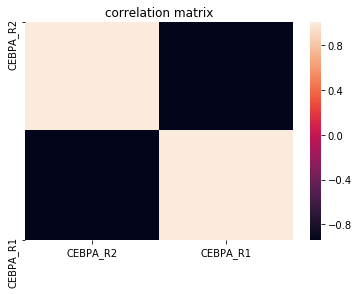

In [89]:
sns.heatmap(np.corrcoef(peakmatrix.T), xticklabels=merged_bed.columns, yticklabels=merged_bed.columns).set_title("correlation matrix")

In [136]:
totpeak = np.sum(peakmatrix,0)

In [160]:
merged_bed

,CEBPA_R2,CEBPA_R1
0,1,1
1,1,0
2,1,1
3,1,0
4,1,1
...,...,...
79124,1,0
79125,1,0
79126,0,1
79127,1,0


In [137]:
totpeak

array([56867, 24451])

In [105]:
biggest_ind = np.argsort(totpeaks)[::-1]

In [111]:
peakmatrix[0]

array([1, 1])

In [120]:
np.corrcoef([[1,0,1,1],[0,1,0,0]])

array([[ 1., -1.],
       [-1.,  1.]])

In [108]:
biggest = finalpeaks[biggest_ind[0]]

KeyError: 0

In [140]:
totpeak

array([56867, 24451])

In [141]:
totpeak[1] > totpeak[0] * 0.5

False

In [157]:
replicate

NameError: name 'replicate' is not defined

In [145]:
np.sum(peakmatrix[:,0])

56867

In [152]:
peakname

NameError: name 'peakname' is not defined

In [150]:
tolookfor = np.logical_and(peakmatrix[:,0], peakmatrix[:,1] == 0)

In [162]:
import pysam

In [175]:
bam= pysam.AlignmentFile("data/seqs/results/bwa/CEBPA_R1.mLb.clN.sorted.bam" , 'rb', threads=4)

In [167]:
res = np.zeros(len(tolookfor))

In [ ]:
additionalpeaks = findAdditionalPeaks(merged_bed, tolookfor, peakname, bamfolder,
                                    avgCov[peakname], window, numthread)

In [171]:
finalpeaks

,chrom,start,end,peak_number,size,foldchange,log10pvalue,log10qvalue,relative_summit_pos
0,1,240894,241206,0,312,4.804915,0,0,73
1,1,773653,773927,1,274,7.070460,0,0,106
2,1,936099,936414,2,315,11.054150,0,0,219
3,1,993333,993582,3,249,6.890990,0,0,104
4,1,1121065,1121447,4,382,11.903060,0,0,218
...,...,...,...,...,...,...,...,...,...
79124,Y,23809719,23810014,79124,295,10.605690,0,0,123
79125,Y,23812444,23812811,79125,367,13.056180,0,0,176
79126,Y,23812522,23812723,79126,201,6.281570,0,0,111
79127,Y,23861757,23861992,79127,235,5.319180,0,0,157


In [ ]:
for i, val in enumerate(tolookfor):
    if val:
        print(i/len(tolookfor),end='\r')
        pos = finalpeaks.iloc[i]
        center = int((pos['start'] + pos['end']) / 2)
        zone = np.zeros(window * 2)
        for pileupcolumn in bam.pileup(contig=str(pos['chrom']), start=center - window,
                                           stop=center + window - 1, truncate=True):
            if pileupcolumn.n > 4 * 0.8685466305219209:
                res[i] = 1
                break


KeyboardInterrupt



In [ ]:
res

In [126]:
overlap len(inp[0] & inp[1]) / len(inp[0])

0.038493326533842125

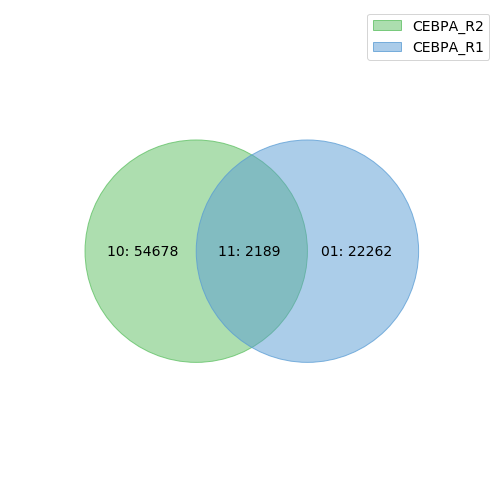

In [80]:
helper.venn(inp, merged_bed.columns)

In [50]:
chiphelper.mergeReplicatePeaks(bindings, replicates, bamfolder="data/seqs/results/bwa/", 
                               markedasbad=bad, avgCov=meancov, window=200, numthread=4)

/!/ should only be passed peaks with at least one good replicate
> /home/jeremie/JKBio/epigenetics/ChIP_helper.py(381)mergeReplicatePeaks()
-> for tf, rep in reps.items():
(Pdb) n
> /home/jeremie/JKBio/epigenetics/ChIP_helper.py(382)mergeReplicatePeaks()
-> print("doing peak " + tf)
(Pdb) 
doing peak CEBPA
> /home/jeremie/JKBio/epigenetics/ChIP_helper.py(383)mergeReplicatePeaks()
-> finalpeaks = simpleMergedPeaks(peaks[peaks['tf'] == tf])
(Pdb) 


KeyboardInterrupt: 

## show replicates overlap

## annotatePeaks

## create groups

## use HiC data to create more important groups

## compute differentiality

### do same compute using ENCODE data
we need to redo everything for similar normal cell type, getting TFs based on the CRC (find it with CRCmapper or on litterature)

### and find differential expression given assignement

### and find ones that correspond to differential essentiality

## correlate groups with RNA expression